## Problem 1

##  Classify the Size_Categorie of the forest fire area, using SVM

## Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

## IMPORT DATASET

In [2]:
forest=pd.read_csv("forestfires.csv")
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


## EDA

In [3]:
# To find the information of dataset

In [4]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
forest.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Droping unwanted columns
forest1=forest.drop(forest.columns[11:30],axis=1)
forest1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


## Duplicate

In [7]:
forest1[forest1.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,small


In [8]:
# droping duplicated values
forest1.drop_duplicates()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


## correlation

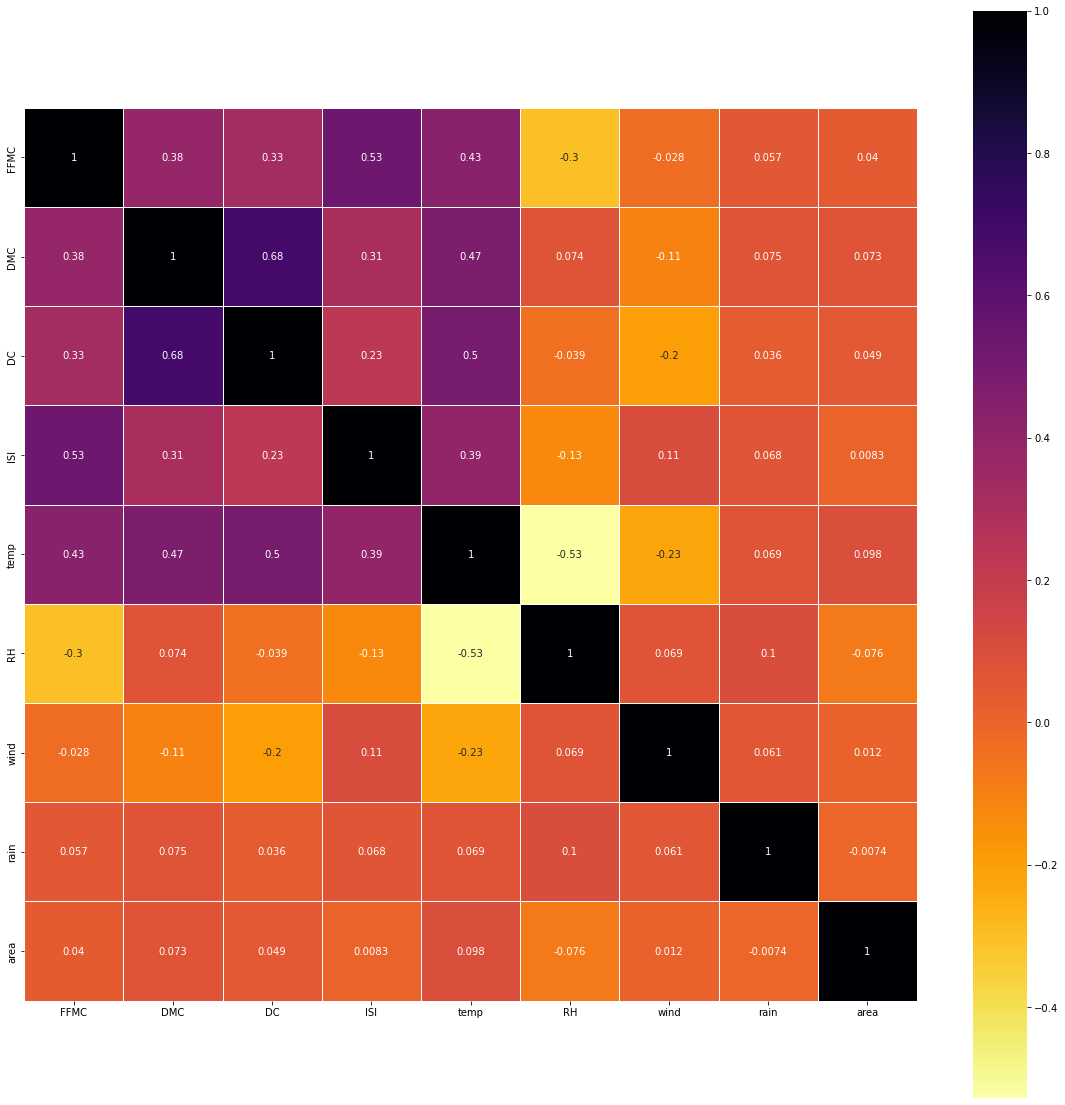

In [9]:
cor=forest1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(data=cor, annot= True, linewidth=.5, square=True, cmap="inferno_r")
plt.show()

## Histplot- To check whether it is normally distributed or not

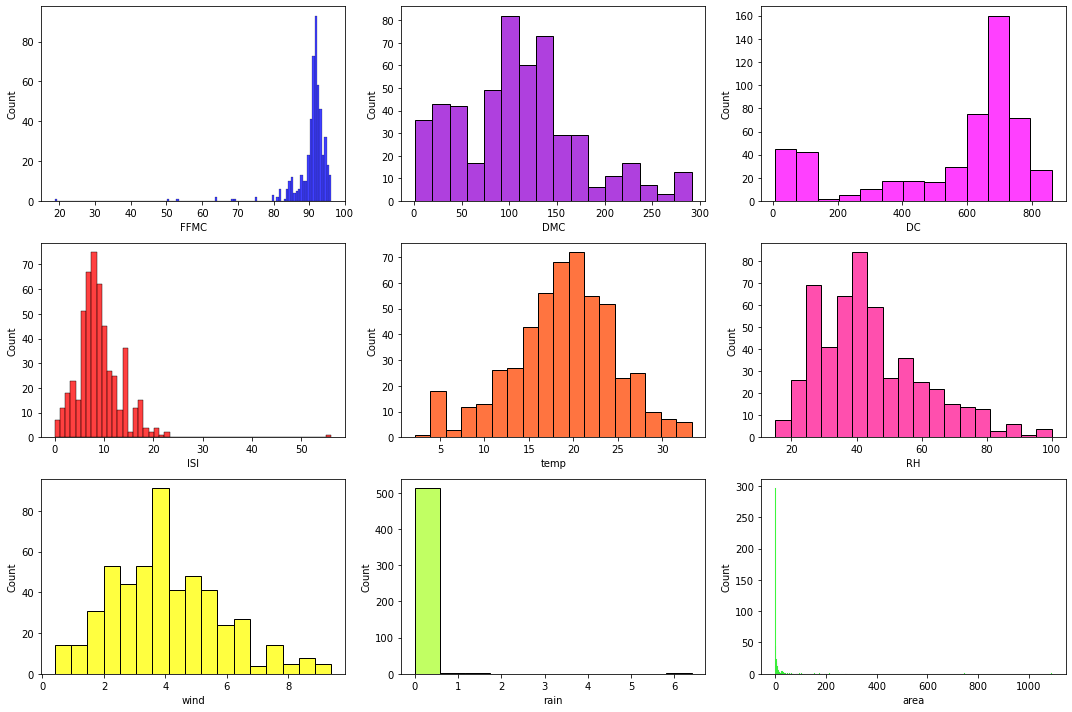

In [10]:
fig, ax= plt.subplots(3,3, figsize=(15,10))

sns.histplot(forest1["FFMC"],ax=ax[0,0],color="blue")
sns.histplot(forest1["DMC"],ax=ax[0,1],color="darkviolet")
sns.histplot(forest1["DC"],ax=ax[0,2],color="magenta")
sns.histplot(forest1["ISI"],ax=ax[1,0],color="red")
sns.histplot(forest1["temp"],ax=ax[1,1],color="orangered")
sns.histplot(forest1["RH"],ax=ax[1,2],color="deeppink")
sns.histplot(forest1["wind"],ax=ax[2,0],color="yellow")
sns.histplot(forest1["rain"],ax=ax[2,1],color="greenyellow")
sns.histplot(forest1["area"],ax=ax[2,2],color="lime")

plt.tight_layout()
plt.show()

## Box plot - Checking Outliers

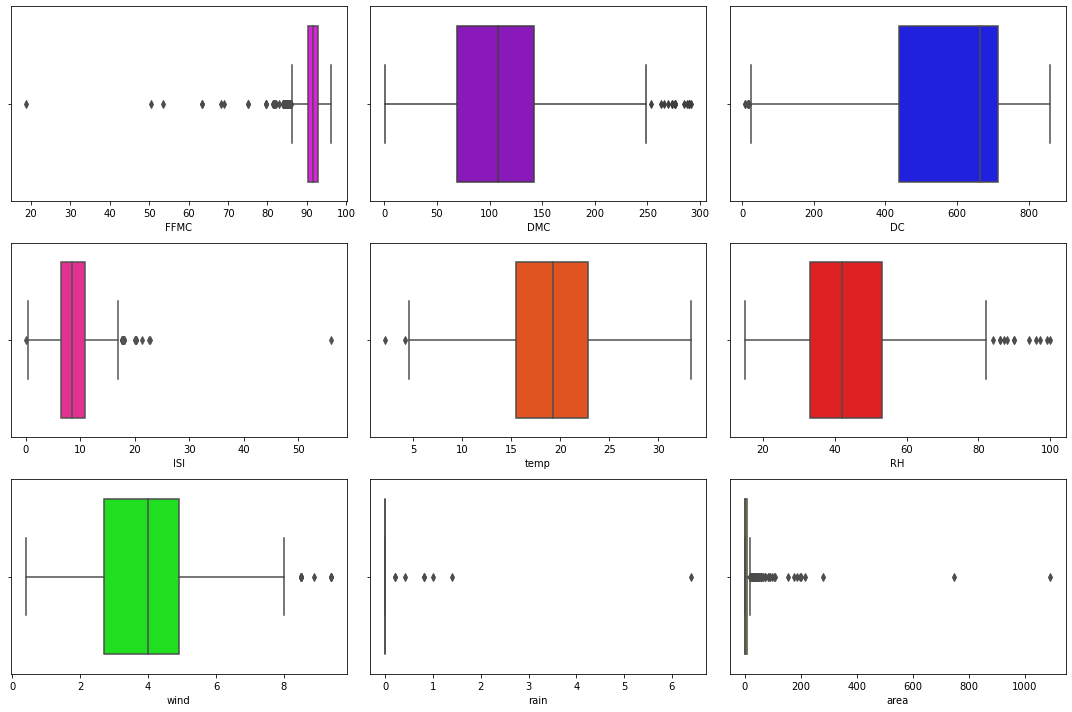

In [11]:
fig, ax = plt.subplots(3, 3, figsize=(15,10))

sns.boxplot(forest1["FFMC"], ax=ax[0,0],color='magenta')
sns.boxplot(forest1["DMC"], ax=ax[0,1],color='darkviolet')
sns.boxplot(forest1["DC"], ax=ax[0,2],color='blue')
sns.boxplot(forest1["ISI"], ax=ax[1,0],color='deeppink')
sns.boxplot(forest1["temp"], ax=ax[1,1],color='orangered')
sns.boxplot(forest1["RH"], ax=ax[1,2],color='red')
sns.boxplot(forest1["wind"], ax=ax[2,0],color='lime')
sns.boxplot(forest1["rain"], ax=ax[2,1],color='yellowgreen')
sns.boxplot(forest1["area"], ax=ax[2,2],color='yellow')


plt.tight_layout()
plt.show()

## Labelencoder

In [12]:
from sklearn.preprocessing import LabelEncoder
LB=LabelEncoder()

In [13]:
forest1["size_category"]=LB.fit_transform(forest1["size_category"])
forest1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


In [14]:
forest1["month"].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [15]:
forest1["month"].replace(("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"),(1,2,3,4,5,6,7,8,9,10,11,12), inplace = True )
forest1["day"].replace(("mon","tue","wed","thu","fri","sat","sun"),(1,2,3,4,5,6,7), inplace = True )

In [16]:
forest1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


In [17]:
forest1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    int32  
dtypes: float64(8), int32(1), int64(3)
memory usage: 46.6 KB


### spliting independent and dependent variables from the new dataset

In [18]:
x= forest1.iloc[:,0:11]
y=forest1.iloc[:,-1]

In [19]:
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

## Spliting to train and test

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=30)

In [23]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((361, 11), (361,), (156, 11), (156,))

## Grid Search CV - To construct an SVM model with the best values

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [25]:
clf1=SVC()
param_grid1=[{'kernel':["rbf"],"gamma":[50,5,0.5,0.2,0.1,0.05],"C":[15,14,20,30,35,48,12,16,29] }]
gsv1=GridSearchCV(clf1,param_grid1,cv=10)
gsv1.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 20, 30, 35, 48, 12, 16, 29],
                          'gamma': [50, 5, 0.5, 0.2, 0.1, 0.05],
                          'kernel': ['rbf']}])

In [26]:
gsv1.best_params_,gsv1.best_score_

({'C': 15, 'gamma': 0.05, 'kernel': 'rbf'}, 0.7451201201201202)

## Contruct a SVM model with the best values that is obtained from the above GridSearchCV

In [27]:
clf1=SVC(C=15, gamma = 0.05, kernel="rbf")
clf1.fit(x_train,y_train)
y_test_pred=clf1.predict(x_test)
acc1=accuracy_score(y_test,y_test_pred)*100
print("Accuracy =",acc1)
confusion_matrix(y_test,y_test_pred)

Accuracy = 74.35897435897436


array([[  3,  39],
       [  1, 113]], dtype=int64)

## Constructing a SVM Model with kernel as polynomial and running it on the grid search to identify the best values with different gamma and C values

In [28]:
clf2 =SVC()
param_grid2=[{'kernel':["poly"],"gamma":[50,5,0.5,0.2,0.1,0.05],"C":[15,14,20,30,35,48,12,16,29] }]
gsv2=GridSearchCV(clf2,param_grid2,cv=10)
gsv2.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 20, 30, 35, 48, 12, 16, 29],
                          'gamma': [50, 5, 0.5, 0.2, 0.1, 0.05],
                          'kernel': ['poly']}])

In [29]:
gsv2.best_params_,gsv2.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'poly'}, 0.9722222222222221)

## Construct a SVM model with the best values that is obtained from the above GridSearchCV with polynomial kernel

In [30]:
clf2=SVC(C=15,gamma=50,kernel="poly")
clf2.fit(x_train,y_train)
y_test_pred2=clf2.predict(x_test)
acc2=accuracy_score(y_test,y_test_pred2)*100
print("Accuracy =",acc2)
confusion_matrix(y_test,y_test_pred2)

Accuracy = 96.15384615384616


array([[ 39,   3],
       [  3, 111]], dtype=int64)

## Constructing a SVM model with kernal as Sigmoid and running it on the grid search to identify the best values with different gamma and C values

In [31]:
clf3=SVC()
param_grid3=[{'kernel':["sigmoid"],"gamma":[50,5,0.5,0.2,0.1,0.05],"C":[15,14,20,30,35,48,12,16,29] }]
gsv3=GridSearchCV(clf3,param_grid3,cv=10)
gsv3.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 20, 30, 35, 48, 12, 16, 29],
                          'gamma': [50, 5, 0.5, 0.2, 0.1, 0.05],
                          'kernel': ['sigmoid']}])

In [32]:
gsv3.best_params_,gsv3.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'sigmoid'}, 0.7313063063063063)

## Construction an SVM model with the best values that is obtained from the above GridSearchCV with sigmoid kernel

In [33]:
clf3=SVC(C=15, gamma=50, kernel="sigmoid")
clf3.fit(x_train,y_train)
y_test_pred3=clf3.predict(x_test)
acc3=accuracy_score(y_test,y_test_pred3)*100
print("Accuracy =",acc3)
confusion_matrix(y_test,y_test_pred3)

Accuracy = 73.07692307692307


array([[  0,  42],
       [  0, 114]], dtype=int64)

## Make a dataframe of each model and score

In [34]:
a={"Model":["rbf","poly","signoid"],
   "score":[acc1,acc2,acc3]}
MA=pd.DataFrame(a)
MA

,Model,score
0,rbf,74.358974
1,poly,96.153846
2,signoid,73.076923


## Inference:

## From the accuracy score its clear that polynomial svm is having the best score amoung them. So for classification of forest area polynomial kernel is best with high score 96.15%

## ======================================================================================